# Global Solar

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

1.country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2.country_long (text): longer form of the country designation
3.name (text): name or title of the power plant, generally in Romanized form
4.gppd_idnr (text): 10 or 12 character identifier for the power plant
5.capacity_mw (number): electrical generating capacity in megawatts
6.latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7.longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8.primary_fuel (text): energy source used in primary electricity generation or export
9.other_fuel1 (text): energy source used in electricity generation or export
10.other_fuel2 (text): energy source used in electricity generation or export
11.other_fuel3 (text): energy source used in electricity generation or export
12.commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
13.owner (text): majority shareholder of the power plant, generally in Romanized form
14.source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15.url (text): web document corresponding to the source field
16.geolocation_source (text): attribution for geolocation information
17.wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18.year_of_capacity_data (number): year the capacity information was reported
19.generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
20.generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
21.generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
22.generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
23.generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
24.generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
25.generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
26.generation_data_source (text): attribution for the reported generation information
27.estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
28.estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
29.estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
30.estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
31.estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
32.estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
33.estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
34.estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
35.estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
36.estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

Target Variable:Primary Fuel

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Global-solar.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

From the above dataset we can seee data has more than 50% as null value se we have to dropped those columns

In [9]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [10]:
df.shape

(907, 13)

Now our data has 13 columns

In [11]:
df.nunique().to_frame()

,0
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


From the above unique value we have seen that there are some columns which has large number of unique value which is difficult for our Machine learning so we are dropping those columns which has large number of unique values

In [12]:
df.drop(['name','gppd_idnr','country','country_long','year_of_capacity_data','url'],axis=1,inplace=True)

In [13]:
df.shape

(907, 7)

In [14]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

As we can see our dataset has the null values so we have to replace those null values

<Axes: >

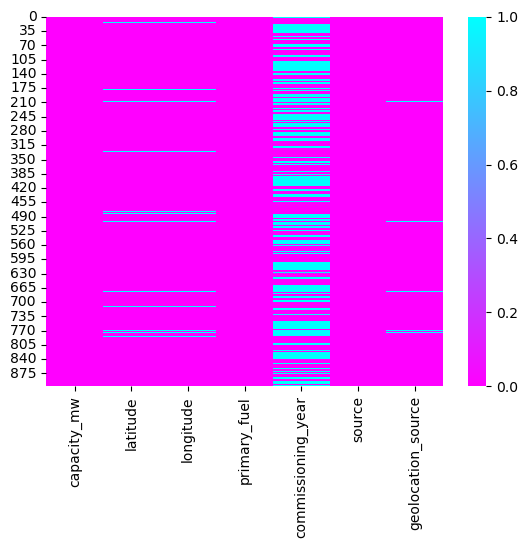

In [15]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [16]:
float_type=[]
for k in df.dtypes.index:
    if df.dtypes[k]=='float':
        float_type.append(k)
print('float_type=',float_type)

object_type=[]
for k in df.dtypes.index:
    if df.dtypes[k]=='object':
        object_type.append(k)
print('object_type=',object_type)

float_type= ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']
object_type= ['primary_fuel', 'source', 'geolocation_source']


In [17]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode(),inplace=True)

In [18]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['geolocation_source']=im.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year']=im.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

We are replacing the latitude,longitude missing values by mean value and geolocation source and commissioning year by mode

<Axes: >

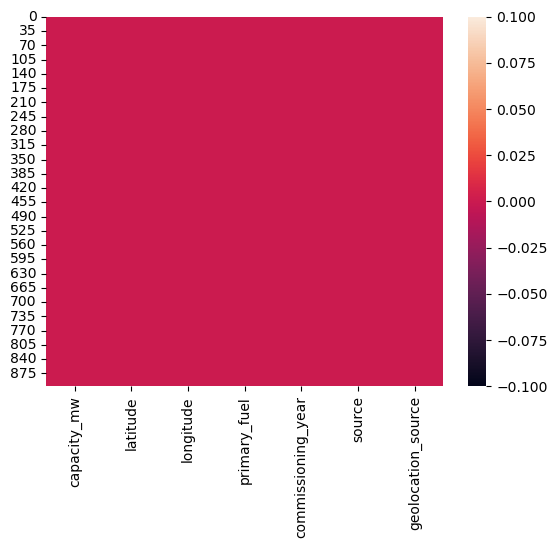

In [20]:
sns.heatmap(df.isnull())

Now we can see there is no null values present in our dataset

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<Axes: xlabel='primary_fuel', ylabel='count'>

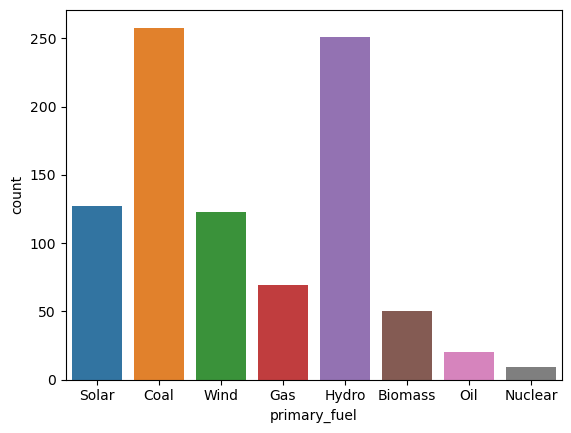

In [21]:
print(df['primary_fuel'].value_counts())
sns.countplot(x='primary_fuel',data=df)

From above plot we can see Coal and Hydro has the more number of count as primary fuel where as Nuclear has the least count when comes to primary fuel

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<Axes: xlabel='geolocation_source', ylabel='count'>

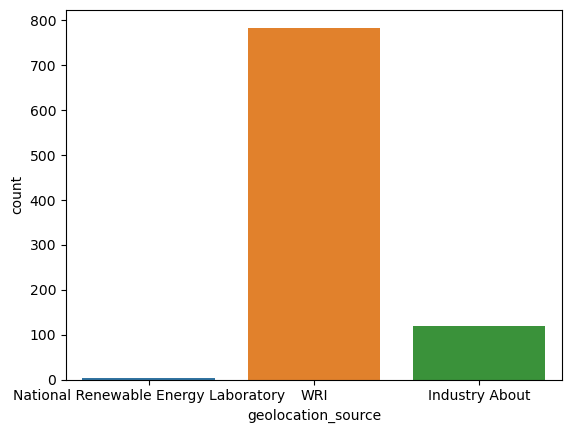

In [22]:
print(df['geolocation_source'].value_counts())
sns.countplot(x='geolocation_source',data=df)

For geolocation source the WRI has the highest number of count followed by Industry about and National Renewable energy laboratory has the least almost negligible count

<Axes: xlabel='capacity_mw', ylabel='Count'>

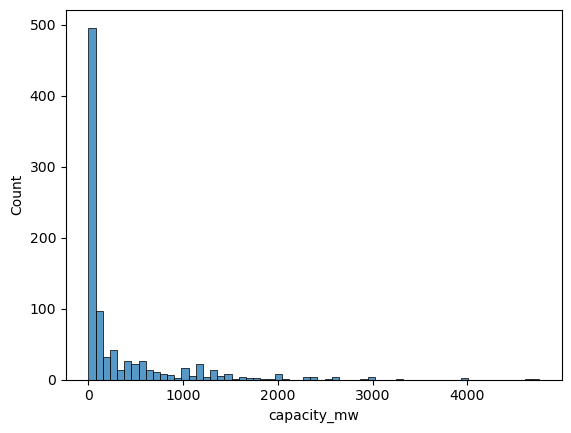

In [23]:
sns.histplot(x='capacity_mw',data=df)

<Axes: xlabel='commissioning_year', ylabel='Count'>

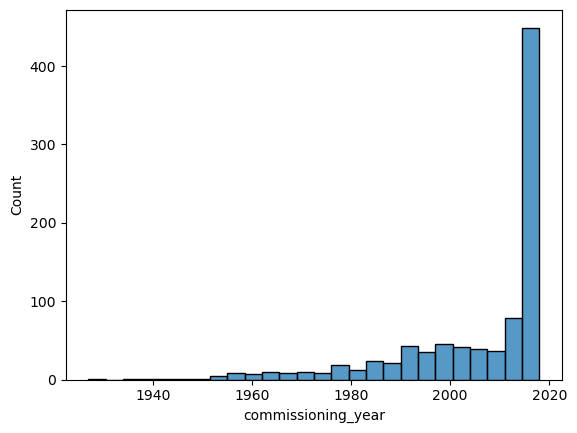

In [24]:
sns.histplot(x='commissioning_year',data=df)

From the above histplot we can see for 2020 commissioning year has the highest count

<Axes: xlabel='latitude', ylabel='Count'>

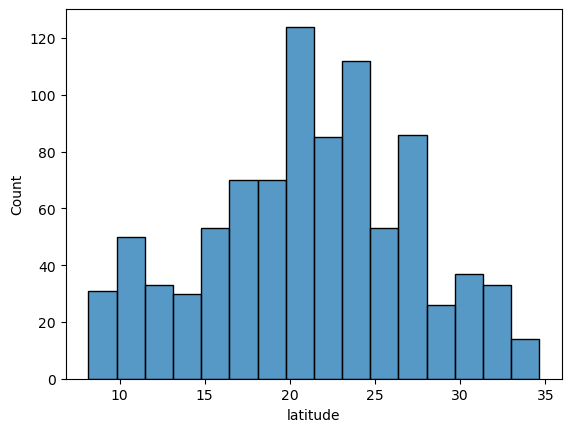

In [25]:
sns.histplot(x='latitude',data=df)

The latitude count has the highest count between 20-25

<Axes: xlabel='longitude', ylabel='Count'>

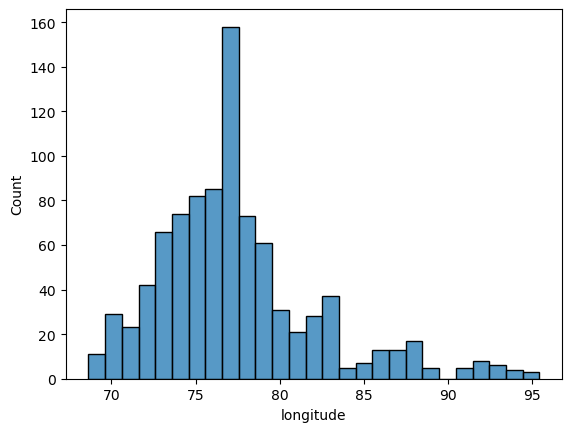

In [26]:
sns.histplot(x='longitude',data=df)

Longitude has the highest count between 75-80

<Axes: xlabel='latitude', ylabel='capacity_mw'>

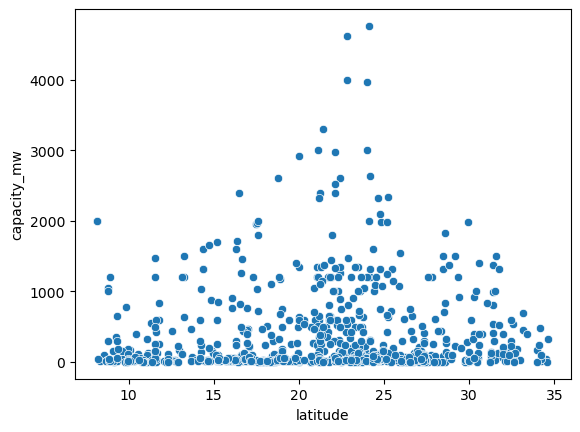

In [27]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df)

From the above scatterplot we can see latitude is highest measuring mega watts in between 20-25

<Axes: xlabel='longitude', ylabel='capacity_mw'>

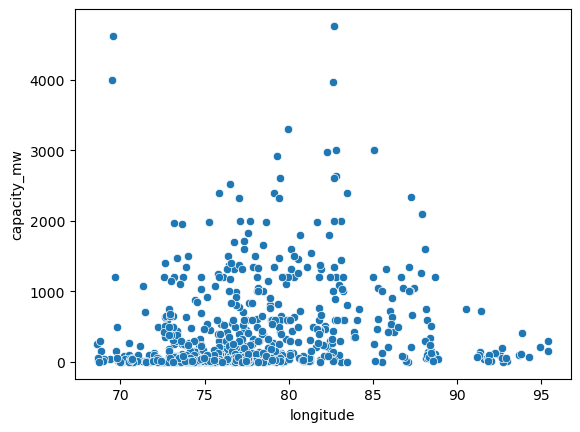

In [28]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df)

The longitude which has the highest power generation is highest between the 70 and then 80-85

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

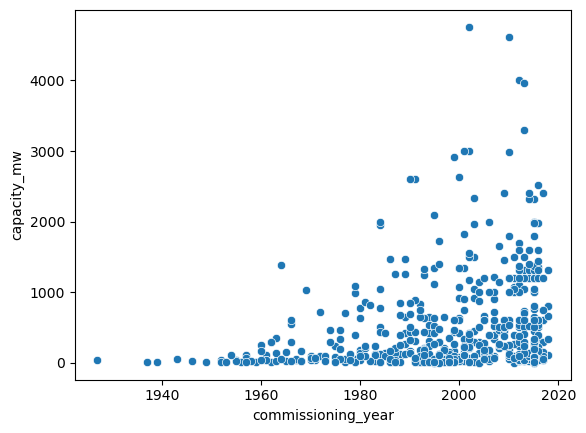

In [29]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df)

For the commissioning year the highest power generation is in between 2000-2020 year

<Axes: xlabel='primary_fuel', ylabel='longitude'>

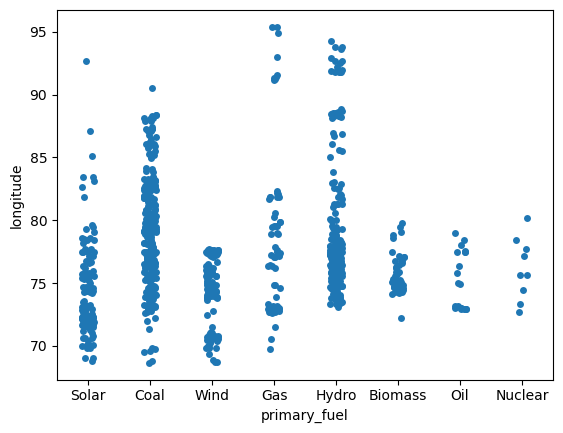

In [30]:
sns.stripplot(x='primary_fuel',y='longitude',data=df)

From stripplot we can see for the longitude the gas as primary fuel has the highest count followed by hydro fuel and solar

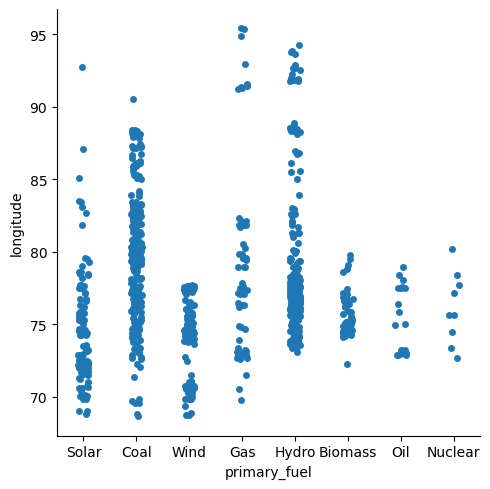

In [31]:
sns.catplot(x='primary_fuel',y='longitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

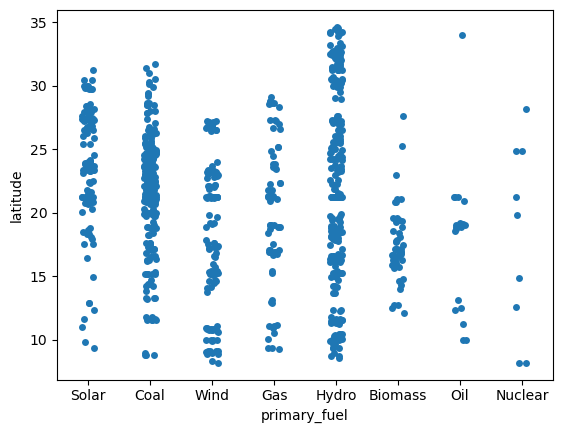

In [32]:
sns.stripplot(x='primary_fuel',y='latitude',data=df)

For the latitude the hydro as primary fuel has the highest count and oil also has the highest count

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

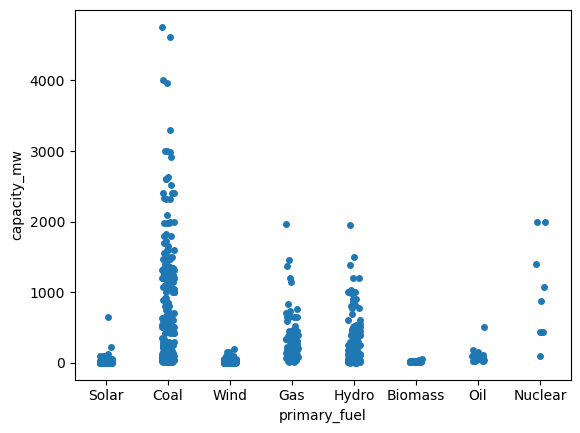

In [33]:
sns.stripplot(x='primary_fuel',y='capacity_mw',data=df)

From the above plot we can see that coal producing the highest power and biomass will produce least power generation

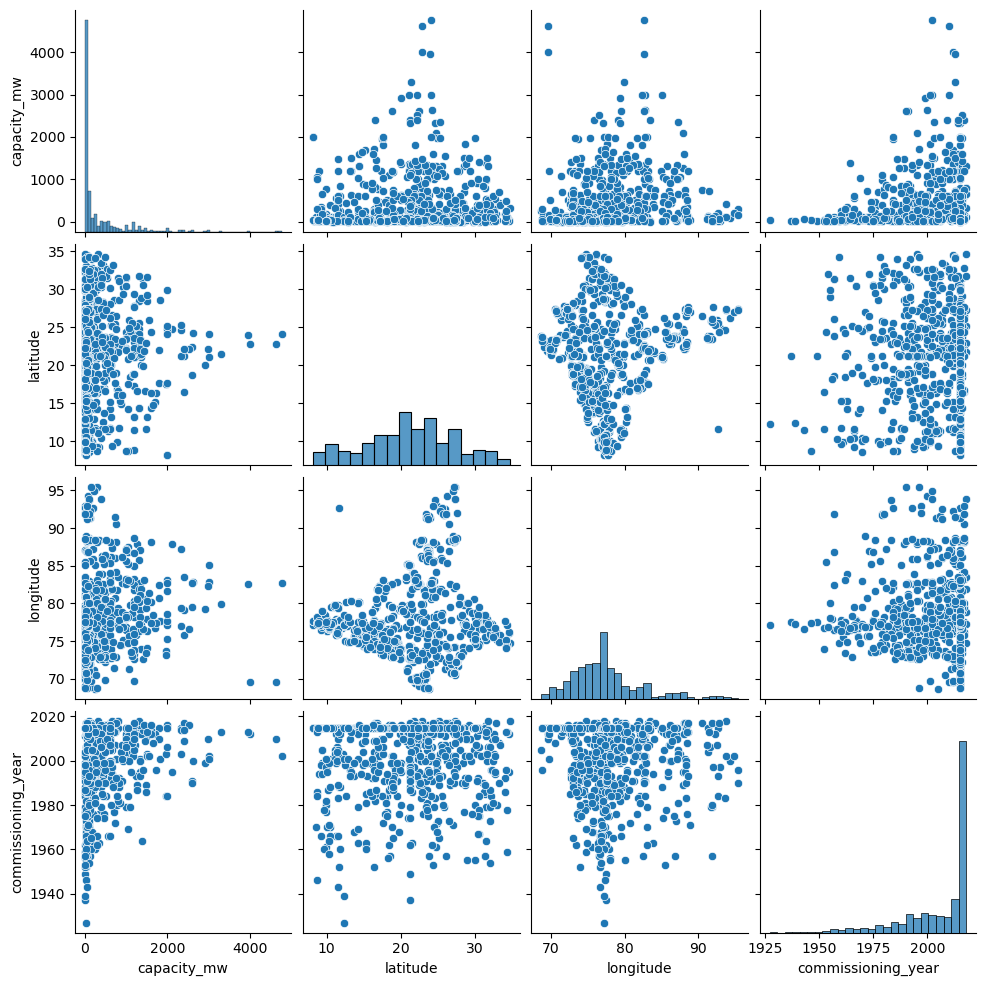

In [34]:
sns.pairplot(data=df,palette='Dark2')

In [35]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267
std,590.085456,6.079148,4.812291,15.734928
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,17.072000,74.388900,1998.000000
50%,59.200000,21.281800,76.979200,2014.000000
75%,385.250000,25.176450,79.206100,2015.000000
max,4760.000000,34.649000,95.408000,2018.000000


array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'commissioning_year'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

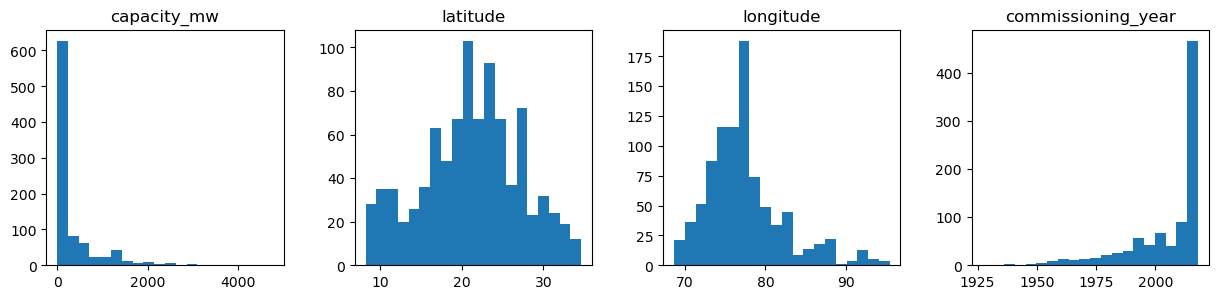

In [36]:
df.hist(figsize=(15,15),layout=(4,4),grid=False,bins=20)

In [37]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
commissioning_year   -1.714873
dtype: float64

from the above we can see that capacity_mw has the skewness so we are removing skewness 

In [38]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['longitude']=np.cbrt(df['longitude'])

In [39]:
df.skew()

capacity_mw           1.013378
latitude             -0.149698
longitude             1.002134
commissioning_year   -1.714873
dtype: float64

As we can see the skewness removed from the data

array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'commissioning_year'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

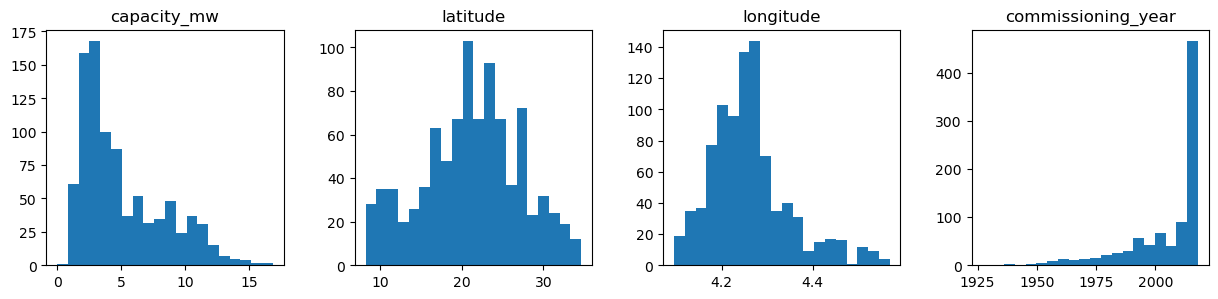

In [40]:
df.hist(figsize=(15,15),layout=(4,4),bins=20,grid=False)

capacity_mw              Axes(0.125,0.712609;0.133621x0.167391)
latitude              Axes(0.285345,0.712609;0.133621x0.167391)
longitude              Axes(0.44569,0.712609;0.133621x0.167391)
commissioning_year    Axes(0.606034,0.712609;0.133621x0.167391)
dtype: object

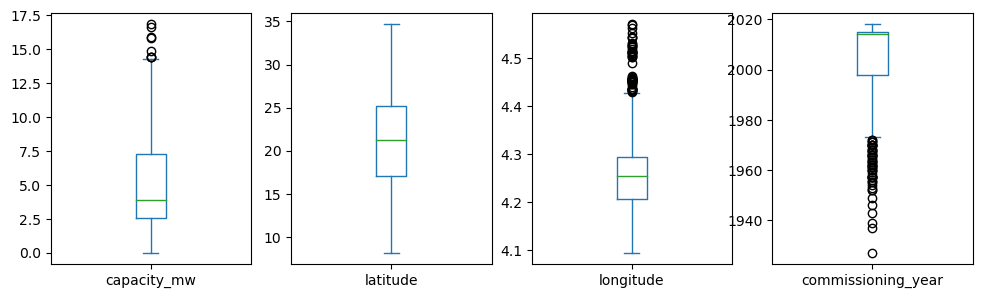

In [41]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15))

From the above boxplot we can see capacity_mw,longitude, commissioning_year has the outliers we can remove the outliers by zscore method

We now converting object datatypes into integer using labelencoder method

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['source']=le.fit_transform(df['source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [43]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.357209,28.1839,4.183928,6,2011.0,109,1
1,4.610436,24.7663,4.209822,1,2015.0,174,2
2,3.396999,21.9038,4.108947,7,2015.0,21,2
3,5.129928,23.8712,4.503868,2,2004.0,22,2
4,12.164404,21.9603,4.351694,1,2015.0,22,2
...,...,...,...,...,...,...,...
902,11.696071,16.2949,4.260882,1,2016.0,22,2
903,1.442250,12.8932,4.275677,6,2015.0,77,0
904,2.943383,15.2758,4.228027,7,2015.0,21,2
905,4.308869,24.3500,4.193560,1,2015.0,59,2


In [44]:
from scipy.stats import zscore

dfs=np.abs(zscore(df))
print(np.where(dfs>3))

(array([ 71,  80, 179, 183, 191, 222, 244, 299, 321, 323, 333, 340, 342,
       345, 360, 371, 416, 427, 444, 454, 478, 484, 493, 494, 519, 538,
       541, 573, 577, 583, 601, 621, 638, 661, 669, 689, 695, 706, 709,
       728, 807, 808, 818, 832, 848, 870, 871, 879, 880, 895, 900],
      dtype=int64), array([5, 5, 2, 2, 5, 4, 2, 5, 5, 2, 2, 2, 4, 5, 2, 4, 2, 2, 4, 4, 4, 4,
       0, 0, 2, 4, 4, 4, 2, 4, 4, 4, 2, 5, 5, 5, 0, 4, 4, 4, 4, 0, 2, 5,
       4, 5, 5, 5, 0, 5, 5], dtype=int64))


In [45]:
dfn=df[(dfs<3).all(axis=1)]
dfn

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.357209,28.1839,4.183928,6,2011.0,109,1
1,4.610436,24.7663,4.209822,1,2015.0,174,2
2,3.396999,21.9038,4.108947,7,2015.0,21,2
3,5.129928,23.8712,4.503868,2,2004.0,22,2
4,12.164404,21.9603,4.351694,1,2015.0,22,2
...,...,...,...,...,...,...,...
902,11.696071,16.2949,4.260882,1,2016.0,22,2
903,1.442250,12.8932,4.275677,6,2015.0,77,0
904,2.943383,15.2758,4.228027,7,2015.0,21,2
905,4.308869,24.3500,4.193560,1,2015.0,59,2


In [46]:
df.shape

(907, 7)

In [47]:
dfn.shape

(856, 7)

As we can see we have removed the outliers from our dataset

In [48]:
dfn.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.066371,0.345867,-0.516077,-0.147903,-0.360493,0.368940
latitude,0.066371,1.000000,-0.008448,-0.013535,0.035681,0.069931,-0.191398
longitude,0.345867,-0.008448,1.000000,-0.398366,-0.154846,-0.256225,0.283310
primary_fuel,-0.516077,-0.013535,-0.398366,1.000000,0.190900,0.072911,-0.473112
commissioning_year,-0.147903,0.035681,-0.154846,0.190900,1.000000,0.326079,-0.267093
source,-0.360493,0.069931,-0.256225,0.072911,0.326079,1.000000,-0.523622
geolocation_source,0.368940,-0.191398,0.283310,-0.473112,-0.267093,-0.523622,1.000000


<Axes: >

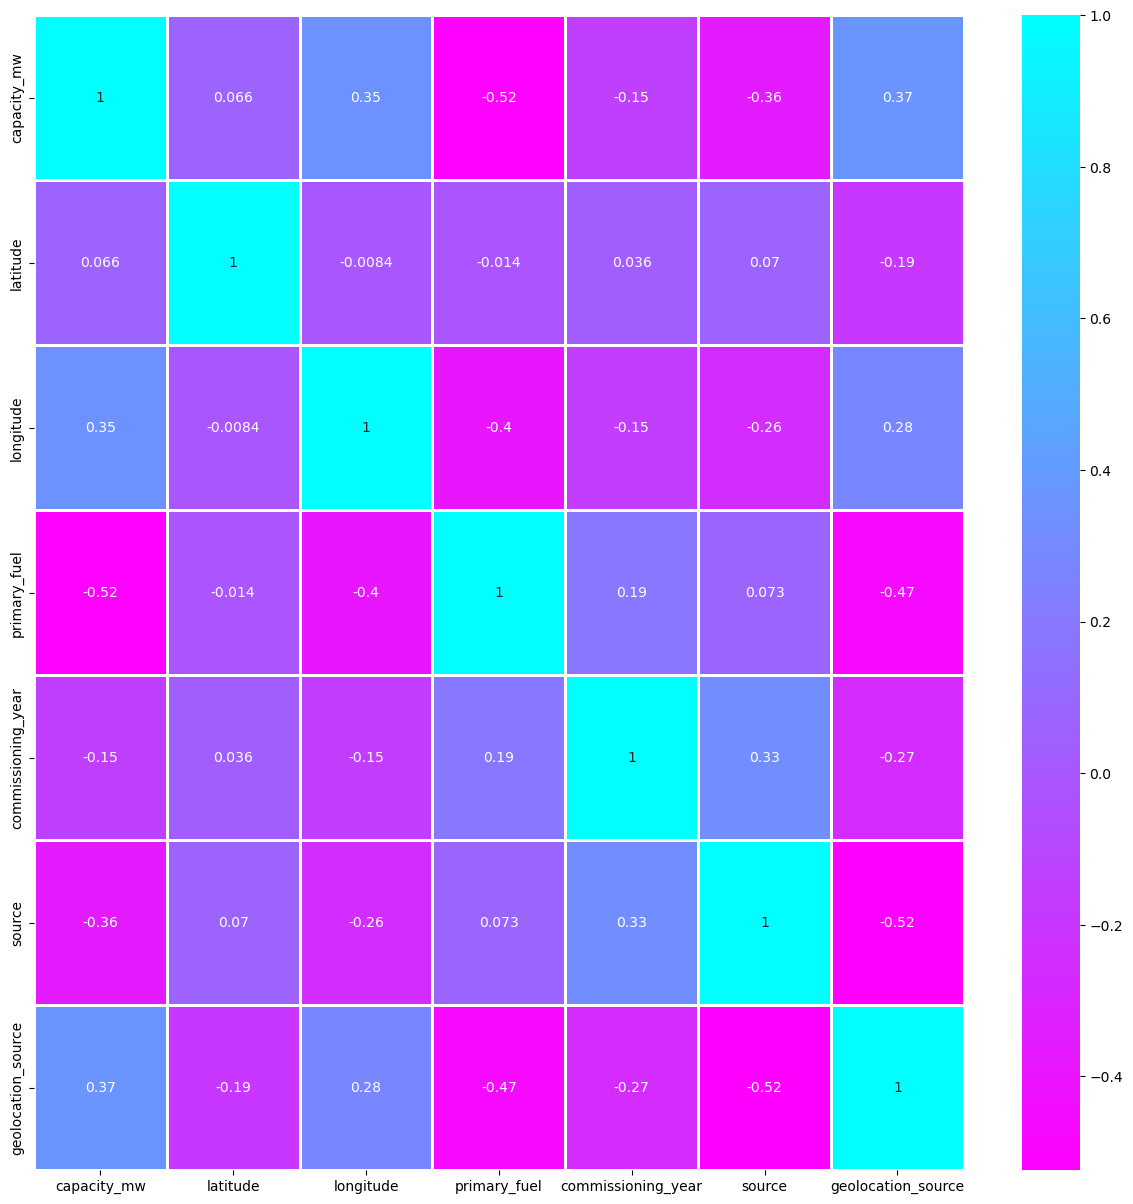

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(dfn.corr(),cmap='cool_r',annot=True,linewidths=2)

1.The capacity_mw and Latitude is positively correlated with each other
2.Thelatitude and longitude is negatively correlated with eachother
3.source,commissioning_year,latitude impacting negative values

In [50]:
x=dfn.drop('primary_fuel',axis=1)
y=dfn['primary_fuel']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.149098,1.158887,-0.909972,0.389448,1.601945,-1.077652
1,-0.141244,0.597596,-0.586032,0.677393,3.160964,0.395943
2,-0.517168,0.127472,-1.847975,0.677393,-0.508727,0.395943
3,0.019695,0.450589,3.092488,-0.114455,-0.484742,0.395943
4,2.198983,0.136752,1.188792,0.677393,-0.484742,0.395943
...,...,...,...,...,...,...
851,2.053893,-0.793707,0.052727,0.749379,-0.484742,0.395943
852,-1.122752,-1.352386,0.237809,0.677393,0.834428,-2.551247
853,-0.657699,-0.961079,-0.358290,0.677393,-0.508727,0.395943
854,-0.234670,0.529225,-0.789474,0.677393,0.402700,0.395943


# VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif=pd.DataFrame()
vif['VIF value']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF value,Features
0,1.318587,capacity_mw
1,1.062113,latitude
2,1.184756,longitude
3,1.139132,commissioning_year
4,1.522277,source
5,1.561538,geolocation_source


As we can see there is no multicollinearity is present in data

In [54]:
y.value_counts()

1    249
3    225
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [55]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [56]:
y1.value_counts()

6    249
1    249
7    249
2    249
3    249
0    249
5    249
4    249
Name: primary_fuel, dtype: int64

# Modelling

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [58]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    rfpred=rf.predict(x_test)
    acc=accuracy_score(y_test,rfpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracy is',maxAccu,'at random state',maxRS)

Best accuracy is 0.9381270903010034 at random state 144


In [59]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
print(confusion_matrix(y_test,dtpred))
print(classification_report(y_test,dtpred))

0.8896321070234113
[[75  7  0  1  0  1  0  0]
 [ 3 44  6  9  2  2  0  0]
 [ 0  6 61  6  1  0  0  0]
 [ 0  6  3 54  5  2  0  0]
 [ 0  0  1  0 75  0  0  0]
 [ 0  0  1  3  0 62  0  0]
 [ 0  1  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        84
           1       0.69      0.67      0.68        66
           2       0.85      0.82      0.84        74
           3       0.74      0.77      0.76        70
           4       0.90      0.99      0.94        76
           5       0.93      0.94      0.93        66
           6       1.00      0.99      0.99        83
           7       1.00      1.00      1.00        79

    accuracy                           0.89       598
   macro avg       0.88      0.88      0.88       598
weighted avg       0.89      0.89      0.89       598



In [60]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

0.9264214046822743
[[84  0  0  0  0  0  0  0]
 [ 6 47  3  5  4  1  0  0]
 [ 0  3 66  1  2  2  0  0]
 [ 0  5  3 59  3  0  0  0]
 [ 0  1  0  0 75  0  0  0]
 [ 0  0  0  3  1 62  0  0]
 [ 0  1  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        84
           1       0.82      0.71      0.76        66
           2       0.92      0.89      0.90        74
           3       0.87      0.84      0.86        70
           4       0.88      0.99      0.93        76
           5       0.95      0.94      0.95        66
           6       1.00      0.99      0.99        83
           7       1.00      1.00      1.00        79

    accuracy                           0.93       598
   macro avg       0.92      0.92      0.92       598
weighted avg       0.93      0.93      0.92       598



In [61]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
ETpred=ET.predict(x_test)
print(accuracy_score(y_test,ETpred))
print(confusion_matrix(y_test,ETpred))
print(classification_report(y_test,ETpred))

0.931438127090301
[[82  0  0  0  0  0  0  2]
 [ 5 49  3  4  4  1  0  0]
 [ 0  2 68  1  1  1  0  1]
 [ 0  4  2 59  5  0  0  0]
 [ 0  1  0  0 75  0  0  0]
 [ 0  0  0  3  1 62  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.88      0.74      0.80        66
           2       0.93      0.92      0.93        74
           3       0.88      0.84      0.86        70
           4       0.87      0.99      0.93        76
           5       0.97      0.94      0.95        66
           6       1.00      1.00      1.00        83
           7       0.96      1.00      0.98        79

    accuracy                           0.93       598
   macro avg       0.93      0.93      0.93       598
weighted avg       0.93      0.93      0.93       598



In [62]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.882943143812709
[[80  1  0  0  0  0  0  3]
 [ 5 44  4  3  6  1  0  3]
 [ 0  1 65  2  2  3  0  1]
 [ 0  5  6 44  9  5  0  1]
 [ 0  0  0  0 76  0  0  0]
 [ 0  0  2  4  1 59  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  2  0  0  0  0  0 77]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        84
           1       0.83      0.67      0.74        66
           2       0.84      0.88      0.86        74
           3       0.83      0.63      0.72        70
           4       0.81      1.00      0.89        76
           5       0.87      0.89      0.88        66
           6       1.00      1.00      1.00        83
           7       0.91      0.97      0.94        79

    accuracy                           0.88       598
   macro avg       0.88      0.87      0.87       598
weighted avg       0.88      0.88      0.88       598



In [63]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)
print(accuracy_score(y_test,lrpred))
print(confusion_matrix(y_test,lrpred))
print(classification_report(y_test,lrpred))

0.6722408026755853
[[69  0  0  0  0  0  0 15]
 [ 9 36  4  2 11  0  0  4]
 [ 3 21 18  2 13 13  0  4]
 [ 0 10  0 32 11 16  0  1]
 [ 0  9  0 11 56  0  0  0]
 [13  0  2 18  3 30  0  0]
 [ 0  1  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        84
           1       0.47      0.55      0.50        66
           2       0.75      0.24      0.37        74
           3       0.49      0.46      0.47        70
           4       0.60      0.74      0.66        76
           5       0.51      0.45      0.48        66
           6       1.00      0.99      0.99        83
           7       0.77      1.00      0.87        79

    accuracy                           0.67       598
   macro avg       0.66      0.66      0.64       598
weighted avg       0.68      0.67      0.65       598



In [64]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.81438127090301
[[75  1  0  0  0  0  0  8]
 [ 4 42  5  4  6  0  0  5]
 [ 0  9 36  2 11 12  0  4]
 [ 0  3  2 39  9 16  0  1]
 [ 0  0  0  0 76  0  0  0]
 [ 0  2  0  4  2 58  0  0]
 [ 0  1  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        84
           1       0.72      0.64      0.68        66
           2       0.84      0.49      0.62        74
           3       0.80      0.56      0.66        70
           4       0.73      1.00      0.84        76
           5       0.67      0.88      0.76        66
           6       1.00      0.99      0.99        83
           7       0.81      1.00      0.90        79

    accuracy                           0.81       598
   macro avg       0.82      0.80      0.80       598
weighted avg       0.82      0.81      0.81       598



In [65]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

0.9063545150501672
[[83  1  0  0  0  0  0  0]
 [ 5 46  4  4  4  3  0  0]
 [ 0  6 58  3  2  5  0  0]
 [ 0  1  2 58  6  3  0  0]
 [ 0  0  0  2 74  0  0  0]
 [ 0  1  0  3  1 61  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        84
           1       0.84      0.70      0.76        66
           2       0.91      0.78      0.84        74
           3       0.83      0.83      0.83        70
           4       0.85      0.97      0.91        76
           5       0.85      0.92      0.88        66
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        79

    accuracy                           0.91       598
   macro avg       0.90      0.90      0.90       598
weighted avg       0.91      0.91      0.90       598



# Cross validation score

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score=cross_val_score(ET,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,ETpred)-score.mean())

[0.81976744 0.86549708 0.86549708 0.80116959 0.84210526]
0.8388072895416837
0.09263083754861734


In [68]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtpred)-score.mean())

[0.79069767 0.74853801 0.78947368 0.78947368 0.79532164]
0.7827009383924929
0.10693116863091845


In [69]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,rfpred)-score.mean())

[0.8372093  0.86549708 0.87719298 0.8128655  0.83040936]
0.8446348429212567
0.08178656176101762


In [70]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,lrpred)-score.mean())

[0.69767442 0.77777778 0.74853801 0.73099415 0.73099415]
0.7371957024343805
-0.0649548997587952


In [71]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.79069767 0.81871345 0.79532164 0.77777778 0.81871345]
0.8002447980416155
0.08269834577109347


In [72]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(accuracy_score(y_test,svcpred)-score.mean())

[0.73255814 0.8128655  0.77192982 0.75438596 0.77777778]
0.7699034407724739
0.04447783013053619


# Hyperparameter Tunning

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
par={'kernel':['poly','rbf','linear'],'degree':[2,3,4,5],'gamma':['scale','auto','float']}
GV=GridSearchCV(SVC(),par,cv=5)
GV.fit(x_train,y_train)
GV.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [74]:
models=SVC(degree=2,gamma='scale',kernel='rbf')
models.fit(x_train,y_train)
pred=models.predict(x_test)
acd=accuracy_score(y_test,pred)
acd*100

81.43812709030101

In [75]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,200,500,1000]}
GV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GV.fit(x_train,y_train)
GV.best_params_

{'C': 0.0001, 'max_iter': 200, 'penalty': 'none', 'solver': 'sag'}

In [76]:
model=LogisticRegression(penalty='l2',C=3792.690190732246,solver='lbfgs',max_iter=100)
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
acc*100

68.39464882943143

In [77]:
grid_params={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distnace'],
            'metric':['minkowski','euclidean','manhattan']}
GV=GridSearchCV(KNeighborsClassifier(),grid_params,cv=5)
GV.fit(x_train,y_train)
GV.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [78]:
Model=KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='uniform')
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
acc=accuracy_score(y_test,pred)
acc*100

89.79933110367892

In [79]:
from sklearn.model_selection import GridSearchCV

pars={'criterion':['gini','entropy'],'random_state':[10,50,1000],'max_depth':[0,10,20],'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]}
GV=GridSearchCV(ExtraTreesClassifier(),pars,cv=5)
GV.fit(x_train,y_train)
GV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [84]:
model1=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=300,random_state=10,n_jobs=-2)
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
acc=accuracy_score(y_test,pred)
acc*100

93.64548494983278

# As we can see the Extratrees classifier model give highest score which is 93% so we are saving the model

# Saving Model

In [85]:
import joblib
joblib.dump(model1,'Globalsolar.pkl')

['Globalsolar.pkl']

In [86]:
model1=joblib.load('Globalsolar.pkl')
Predict=model1.predict(x_test)
Predict

array([0, 5, 6, 4, 2, 3, 0, 7, 7, 0, 3, 6, 4, 5, 4, 6, 2, 2, 1, 6, 1, 2,
       4, 2, 2, 6, 7, 0, 5, 7, 4, 6, 4, 7, 3, 5, 4, 1, 0, 4, 1, 5, 6, 6,
       7, 5, 3, 6, 0, 5, 5, 3, 2, 3, 4, 7, 0, 0, 2, 1, 6, 6, 4, 0, 5, 7,
       7, 4, 7, 0, 5, 2, 7, 1, 3, 7, 4, 1, 0, 0, 4, 2, 2, 2, 0, 0, 4, 0,
       3, 0, 6, 1, 2, 6, 6, 1, 2, 0, 1, 3, 5, 7, 4, 4, 6, 7, 6, 6, 3, 6,
       1, 4, 7, 3, 4, 3, 3, 7, 4, 0, 2, 5, 6, 4, 2, 5, 3, 3, 7, 2, 7, 1,
       5, 6, 4, 2, 0, 1, 1, 4, 3, 1, 7, 2, 2, 4, 0, 0, 7, 4, 3, 6, 3, 2,
       6, 3, 6, 7, 7, 2, 2, 7, 5, 4, 4, 2, 7, 0, 2, 1, 3, 5, 2, 1, 4, 5,
       7, 3, 6, 7, 1, 5, 7, 0, 5, 6, 4, 3, 4, 5, 6, 6, 0, 4, 6, 0, 5, 7,
       6, 1, 6, 0, 2, 2, 1, 0, 4, 2, 6, 6, 5, 4, 3, 4, 7, 3, 4, 0, 2, 5,
       0, 1, 6, 5, 6, 3, 6, 6, 2, 3, 2, 1, 7, 4, 7, 5, 3, 1, 5, 7, 6, 4,
       4, 4, 1, 4, 7, 1, 1, 4, 0, 5, 3, 5, 2, 1, 5, 1, 3, 0, 4, 7, 0, 0,
       5, 0, 5, 4, 3, 6, 4, 5, 3, 4, 5, 2, 1, 2, 7, 7, 6, 5, 7, 4, 1, 2,
       0, 5, 7, 3, 5, 6, 2, 3, 2, 5, 0, 3, 0, 5, 2,

In [87]:
k=np.array(y_test)
K=pd.DataFrame()
K['Predicted']=Predict
K['Original']=k
K

,Predicted,Original
0,0,0
1,5,5
2,6,6
3,4,4
4,2,2
...,...,...
593,7,7
594,1,1
595,6,6
596,7,7
